end_date is initialized to '2021-01-06'


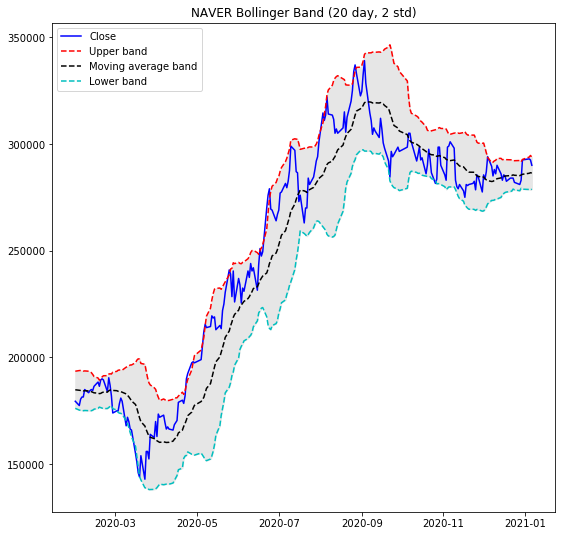

In [2]:
import matplotlib.pyplot as plt

import sys
sys.path.append('C:/Users/PPP/PycharmProjects/StockPriceAPI/Investar')
from Analyzer import MarketDB

mk = MarketDB()
df = mk.get_daily_price('NAVER', '2020-01-01')

df['MA20'] = df['close'].rolling(window=20).mean()   #중간 볼린저 밴드
df['stddev'] = df['close'].rolling(window=20).std()
df['upper'] = df['MA20'] + (df['stddev']*2)          #상단 볼린저 밴드
df['lower'] = df['MA20'] - (df['stddev']*2)          #하단 볼린저 밴드
df = df[19:]

plt.figure(figsize=(9,9))
plt.plot(df.index, df['close'], color='#0000ff', label='Close')
plt.plot(df.index, df['upper'], 'r--', label='Upper band')
plt.plot(df.index, df['MA20'], 'k--', label='Moving average band')
plt.plot(df.index, df['lower'], 'c--', label='Lower band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')
plt.legend(loc='best')
plt.title('NAVER Bollinger Band (20 day, 2 std)')
plt.show()

end_date is initialized to '2021-01-07'


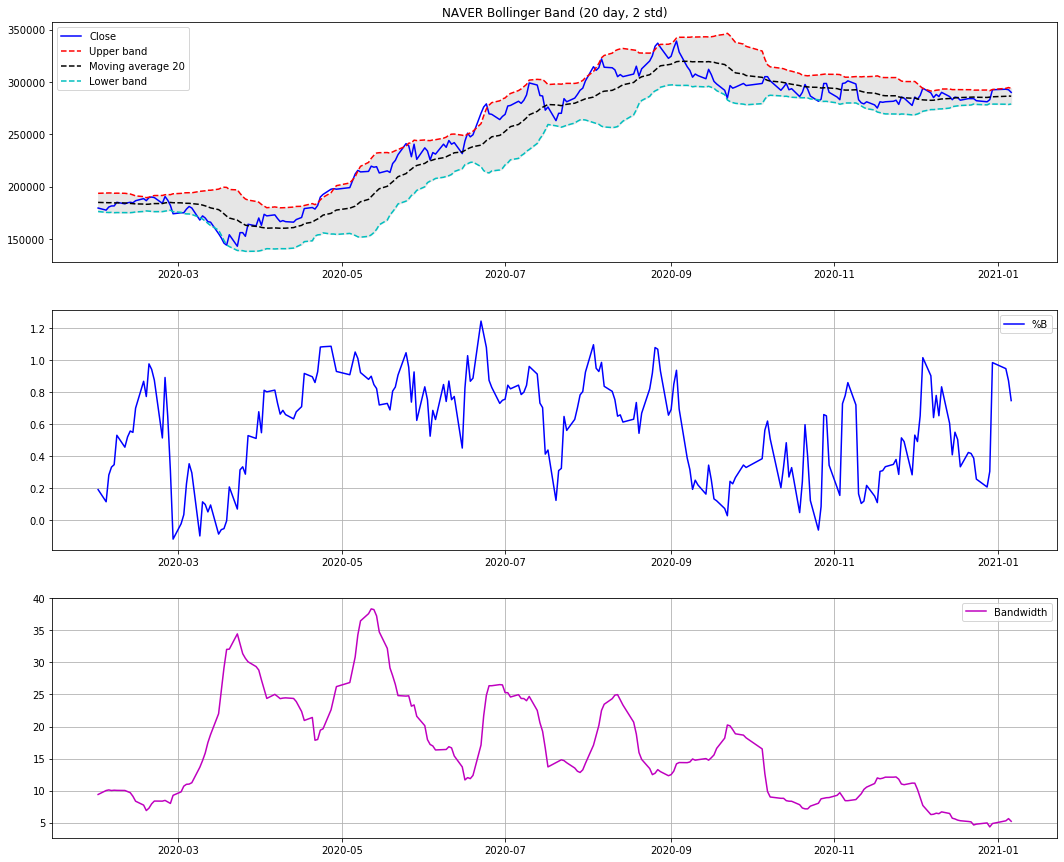

In [3]:
import matplotlib.pyplot as plt

import sys
sys.path.append('C:/Users/PPP/PycharmProjects/StockPriceAPI/Investar')
from Analyzer import MarketDB

mk = MarketDB()
df = mk.get_daily_price('NAVER', '2020-01-01')

df['MA20'] = df['close'].rolling(window=20).mean()   
df['stddev'] = df['close'].rolling(window=20).std()
df['upper'] = df['MA20'] + (df['stddev']*2)   
df['lower'] = df['MA20'] - (df['stddev']*2)
df['PB'] = (df['close'] - df['lower']) / (df['upper'] - df['lower'])
df['bandwidth'] = (df['upper'] - df['lower']) / df['MA20'] * 100
df = df[19:]

plt.figure(figsize=(18,15))
plt.subplot(311)
plt.plot(df.index, df['close'], color='#0000ff', label='Close')
plt.plot(df.index, df['upper'], 'r--', label='Upper band')
plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label='Lower band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')
plt.title('NAVER Bollinger Band (20 day, 2 std)')
plt.legend(loc='best')

plt.subplot(312)
plt.plot(df.index, df['PB'], color='b', label='%B')
plt.grid(True)
plt.legend(loc='best')

plt.subplot(313)
plt.plot(df.index, df['bandwidth'], color='m', label='Bandwidth')
plt.grid(True)
plt.legend(loc='best')
plt.show()